# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [83]:
from pandas_datareader import data as web
import plotly.express as px 
from plotly import graph_objects
import yfinance as yf 
import pandas as pd
import numpy as np

In [84]:
ativos = ['AAPL', 'MSFT', 'TSLA']
dt_ini = '2022-01-01'
yf_data = yf.download(ativos, start=dt_ini, interval='1d')

[*********************100%%**********************]  3 of 3 completed


In [85]:
yf_data.to_csv('yfinance.csv', index=True)

In [86]:
yf_data

Price        Adj Close                               Close              \
Ticker            AAPL        MSFT        TSLA        AAPL        MSFT   
Date                                                                     
2022-01-03  179.481110  327.530121  399.926666  182.009995  334.750000   
2022-01-04  177.203201  321.913940  383.196655  179.699997  329.010010   
2022-01-05  172.489594  309.556366  362.706665  174.919998  316.380005   
2022-01-06  169.610199  307.110260  354.899994  172.000000  313.880005   
2022-01-07  169.777847  307.266754  342.320007  172.169998  314.040009   
...                ...         ...         ...         ...         ...   
2024-07-08  227.820007  466.239990  252.940002  227.820007  466.239990   
2024-07-09  228.679993  459.540009  262.329987  228.679993  459.540009   
2024-07-10  232.979996  466.250000  263.260010  232.979996  466.250000   
2024-07-11  227.570007  454.700012  241.029999  227.570007  454.700012   
2024-07-12  230.904999  453.730011         NaN  230.904999  453.730011   

Price                         High                                 Low  \
Ticker            TSLA        AAPL        MSFT        TSLA        AAPL   
Date                                                                     
2022-01-03  399.926666  182.880005  338.000000  400.356659  177.710007   
2022-01-04  383.196655  182.940002  335.200012  402.666656  179.119995   
2022-01-05  362.706665  180.169998  326.070007  390.113342  174.639999   
2022-01-06  354.899994  175.300003  318.700012  362.666656  171.639999   
2022-01-07  342.320007  174.139999  316.500000  360.309998  171.029999   
...                ...         ...         ...         ...         ...   
2024-07-08  252.940002  227.850006  467.700012  259.440002  223.250000   
2024-07-09  262.329987  229.399994  467.329987  265.609985  226.369995   
2024-07-10  263.260010  233.080002  466.459991  267.589996  229.250000   
2024-07-11  241.029999  232.389999  464.779999  271.000000  225.770004   
2024-07-12         NaN  232.397995  454.959991         NaN  228.679993   

Price                                     Open                          \
Ticker            MSFT        TSLA        AAPL        MSFT        TSLA   
Date                                                                     
2022-01-03  329.779999  378.679993  177.830002  335.350006  382.583344   
2022-01-04  326.119995  374.350006  182.630005  334.829987  396.516663   
2022-01-05  315.980011  360.336670  179.610001  325.859985  382.216675   
2022-01-06  311.489990  340.166656  172.699997  313.149994  359.000000   
2022-01-07  310.089996  336.666656  172.889999  314.149994  360.123322   
...                ...         ...         ...         ...         ...   
2024-07-08  464.459991  244.570007  227.089996  466.549988  247.710007   
2024-07-09  458.000000  250.300003  227.929993  467.000000  251.000000   
2024-07-10  458.859985  257.859985  229.300003  461.220001  262.799988   
2024-07-11  451.549988  239.649994  231.389999  462.980011  263.299988   
2024-07-12  450.644989         NaN  229.000000  454.325012         NaN   

Price          Volume                         
Ticker           AAPL      MSFT         TSLA  
Date                                          
2022-01-03  104487900  28865100  103931400.0  
2022-01-04   99310400  32674300  100248300.0  
2022-01-05   94537600  40054300   80119800.0  
2022-01-06   96904000  39646100   90336600.0  
2022-01-07   86709100  32720000   84164700.0  
...               ...       ...          ...  
2024-07-08   59085900  12962300  157219600.0  
2024-07-09   48076100  17207200  160210900.0  
2024-07-10   62627700  18196100  128519400.0  
2024-07-11   64516900  23064800  220422800.0  
2024-07-12   28052166   6727337          NaN  

[634 rows x 18 columns]

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [88]:
fechamento_vertical1 = yf_data['High'].stack().reset_index()
fechamento_vertical1.columns = ['data', 'ativo', 'high']

fechamento_vertical1.head()

,data,ativo,high
0,2022-01-03,AAPL,182.880005
1,2022-01-03,MSFT,338.000000
2,2022-01-03,TSLA,400.356659
3,2022-01-04,AAPL,182.940002
4,2022-01-04,MSFT,335.200012


In [89]:
fechamento_vertical2 = yf_data['Low'].stack().reset_index()
fechamento_vertical2.columns = ['data', 'ativo', 'low']

fechamento_vertical2.head()

,data,ativo,low
0,2022-01-03,AAPL,177.710007
1,2022-01-03,MSFT,329.779999
2,2022-01-03,TSLA,378.679993
3,2022-01-04,AAPL,179.119995
4,2022-01-04,MSFT,326.119995


In [90]:
df2_columns = fechamento_vertical['low']
fechamento_vertical = pd.concat([fechamento_vertical1, df2_columns], axis=1)

In [91]:
fechamento_vertical['amplitude'] = fechamento_vertical['high'] - fechamento_vertical['low']

In [92]:
fechamento_vertical

,data,ativo,high,low,amplitude
0,2022-01-03,AAPL,182.880005,177.710007,5.169998
1,2022-01-03,MSFT,338.000000,329.779999,8.220001
2,2022-01-03,TSLA,400.356659,378.679993,21.676666
3,2022-01-04,AAPL,182.940002,179.119995,3.820007
4,2022-01-04,MSFT,335.200012,326.119995,9.080017
...,...,...,...,...,...
1897,2024-07-11,MSFT,464.779999,451.549988,13.230011
1898,2024-07-11,TSLA,271.000000,239.649994,31.350006
1899,2024-07-12,AAPL,232.397995,228.679993,3.718002
1900,2024-07-12,MSFT,454.959991,450.644989,4.315002


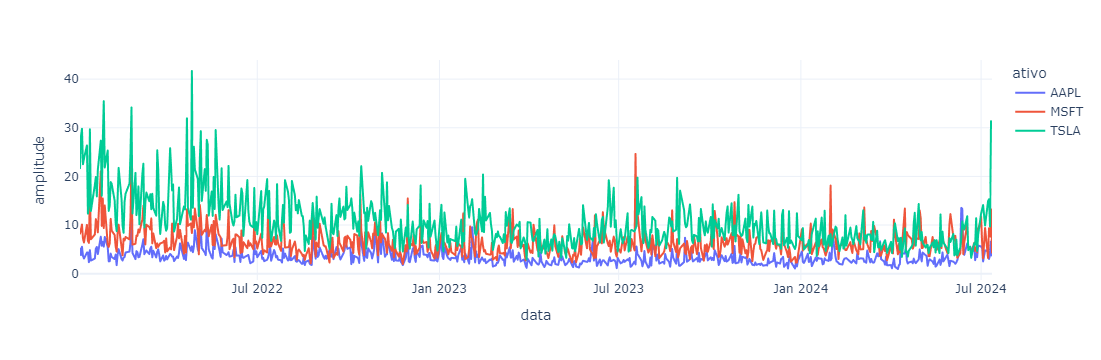

In [93]:
fig = px.line(fechamento_vertical, x="data", y="amplitude", color='ativo', template='plotly_white')
fig.show()

#### Os ativos da Tesla apresentam a maior volatilidade durante todo o período